In [203]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
#Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist #Librairie dataset
(images, targets), (_, _) = fashion_mnist.load_data() #On ignore les informations avec _
images = images[:10000] #On ne prend pas tout le dataset pour aller plus vite
targets = targets[:10000]

#Normalisation des valeurs de 0 a 255 => 0 a 1
from sklearn.preprocessing import StandardScaler
print("Avant normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs sont beaucoup
print("Ecart type valeur pixel: ", images.std()) #trop eleves, il faut donc normaliser
images = images.reshape(-1, 784)                 #On flatten les images en entree 2D => 1D
images = images.astype(float)                    #On definit les valeurs comme etant des float
scaler = StandardScaler()                        #StandardScaler est une fonction de normalisation qui diminue l'ecart type des valeurs
images = scaler.fit_transform(images)
print("Apres normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs ont bien
print("Ecart type valeur pixel: ", images.std()) #change et que la normalisation a eu lieu

#Affichage de nos shape
print("\nShape des images : ", images.shape)
print("Shape de notre liste de classification : ", targets.shape)
#print(images[0]) #Tableau 2D de niveau de gris (0 a 255)
#print(targets[0]) #Numero de la classe

Avant normalisation
Moyenne valeur pixel:  73.00877385204082
Ecart type valeur pixel:  90.2745808471392
Apres normalisation
Moyenne valeur pixel:  -1.0476880134421886e-18
Ecart type valeur pixel:  1.0000000000000007

Shape des images :  (10000, 784)
Shape de notre liste de classification :  (10000,)


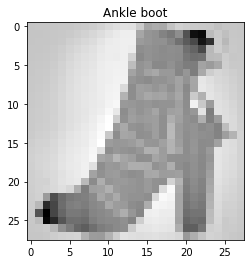

In [205]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle boot"]
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary") #On precise avec "binary" que nous somme sur une image en noir et blanc
plt.title(targets_names[targets[11]])
plt.show()

In [206]:
#print(images[10][0]) #Affiche première ligne de l'image 10
#print(targets_names[targets[10]]) #Type de cette image

In [207]:
#On veut creer un reseau de neurone avec 784 input
print("Taille pixel image : ", images[0].size)
#On veut 2 layers dont la premiere a 256 neurones et la deuxieme 128
#Notre output layer aura 10 neurones car 10 types de classification
print("\nNombre de classificiation : ", len(targets_names))

Taille pixel image :  784

Nombre de classificiation :  10


In [208]:
#Comment formater les données en input
#model = tf.keras.models.Sequential() #On creer un model sequentiel
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #On flatten notre image 28 par 28
#print("Shape avant flatten : ", images[0:1].shape) #On voit ici qu'elle est en 2D
#model_output = model.predict(images[0:1])
#print("Shape après flatten : ", model_output.shape) #On voit ici qu'elle a bien été flatten

In [209]:
#Notre model sera de type sequentiel
model = tf.keras.models.Sequential() #Chaque neurones d'une couche C est connecte a chaque neurones de la couche C-1
#Ajout des layers
model.add(tf.keras.layers.Dense(256, activation="relu")) #256 neurones, fonction activation ReLU
model.add(tf.keras.layers.Dense(128, activation="relu")) #128 neurones, fonction activation ReLU
#10 neurones output car 10 types de classification, activation softmax pour distribution normal probabiliste
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [210]:
#Tentative de prediction
model_output = model.predict(images[3:4])
print("Prediction du type de l'image : ", model_output) 
print("\nType de l'image", targets[3:4])

Prediction du type de l'image :  [[0.08700489 0.21966562 0.04230246 0.06032282 0.07497357 0.09915981
  0.0762412  0.06896216 0.06753705 0.20383048]]

Type de l'image [3]


In [211]:
#On peut afficher un resume du model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [212]:
#Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",  #Fonction de perte
    optimizer="sgd",                         #Optimisation stochastic gradient descent
    metrics=["accuracy"]                     #Accuracy est la metrique que l'on veut utiliser
)

In [213]:
#Entrainement du model
history = model.fit(images, targets, epochs=10) #On passe 10 fois sur l'entierete du datasat

Epoch 1/30
313/313 [==============================] - 0s 748us/step - loss: 1.1724 - accuracy: 0.6195
Epoch 2/30
313/313 [==============================] - 0s 779us/step - loss: 0.5184 - accuracy: 0.8195
Epoch 3/30
313/313 [==============================] - 0s 809us/step - loss: 0.4356 - accuracy: 0.8458
Epoch 4/30
313/313 [==============================] - 0s 790us/step - loss: 0.3896 - accuracy: 0.8619
Epoch 5/30
313/313 [==============================] - 0s 857us/step - loss: 0.3511 - accuracy: 0.8781
Epoch 6/30
313/313 [==============================] - 0s 766us/step - loss: 0.3265 - accuracy: 0.8883
Epoch 7/30
313/313 [==============================] - 0s 807us/step - loss: 0.3012 - accuracy: 0.8956
Epoch 8/30
313/313 [==============================] - 0s 803us/step - loss: 0.2793 - accuracy: 0.9050
Epoch 9/30
313/313 [==============================] - 0s 786us/step - loss: 0.2662 - accuracy: 0.9032
Epoch 10/30
313/313 [==============================] - 0s 786us/step - loss: 0.250

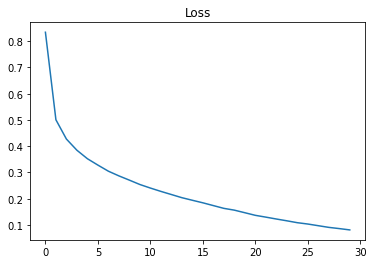

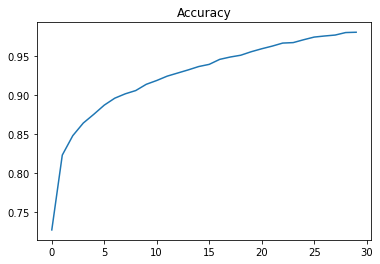

In [214]:
#Affichage des resultats finaux
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
plt.plot(loss_curve)
plt.title("Loss")
plt.show()
plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()